In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 텍스트 위에 라인 추가하는 함수
def print_with_equals(text, repeat_number=50):
    line = "=" * repeat_number
    print('\n')
    print(line)
    print(text)
    print('\n')

# 간단한 데이터 설명, 구조 출력과 pd.DataFrame 반환
def load(path, info=True):
    import pandas as pd
    import numpy as np

    data = pd.read_csv(path)
    if info:
        if len(data) > 0:
            print_with_equals('# DIMENSIONS')
            print(data.shape)
            
            print_with_equals('# MISSING VALUES')
            is_missing_value = np.where(data.isnull().values.any() == False,
                         "NO missing value.",
                         "Missing value.")
            print(is_missing_value)

            print_with_equals('# DATA TYPES')
            dtype_dict = data.dtypes.groupby(data.dtypes).apply(lambda x: x.index.tolist()).to_dict()
            for data_type, columns in dtype_dict.items():
                print(f'{data_type} Variables: {len(columns)}')
                print(columns)
                print('\n')

            display(data.head())
        else:
            pass
    
    return data

# directory에 파일 경로를 설정하세요.
directory = 'data/train.csv'
df = load(directory)




# DIMENSIONS


(10000, 15)


# MISSING VALUES


NO missing value.


# DATA TYPES


int64 Variables: 9
['subscription_duration', 'recent_login_time', 'monthly_active_learning_days', 'total_completed_courses', 'abandoned_learning_sessions', 'community_engagement_level', 'customer_inquiry_history', 'payment_pattern', 'target']


float64 Variables: 3
['average_login_time', 'average_time_per_learning_session', 'recent_learning_achievement']


object Variables: 3
['user_id', 'preferred_difficulty_level', 'subscription_type']




,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


### Data Description
---
user_id : 사용자의 고유 식별자  
subscription_duration : 사용자가 서비스에 가입한 기간 (월)  
recent_login_time : 사용자가 마지막으로 로그인한 시간 (일)  
average_login_time : 사용자의 일반적인 로그인 시간  
average_time_per_learning_session : 각 학습 세션에 소요된 평균 시간 (분)  
monthly_active_learning_days : 월간 활동적인 학습 일수  
total_completed_courses : 완료한 총 코스 수  
recent_learning_achievement : 최근 학습 성취도  
abandoned_learning_sessions : 중단된 학습 세션 수  
community_engagement_level : 커뮤니티 참여도  
preferred_difficulty_level : 선호하는 난이도  
subscription_type : 구독 유형  
customer_inquiry_history : 고객 문의 이력  
payment_pattern :  
    사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값. [m-2 m-1 m]  
    - 7: 3개월 모두 결제함 [1 1 1]  
    - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음 [1 1 0]  
    - 5: 첫 달과 마지막 달에 결제함 [1 0 1]  
    - 4: 첫 달에만 결제함 [1 0 0]  
    - 3: 마지막 2개월에 결제함 [0 1 1]  
    - 2: 가운데 달에만 결제함 [0 1 0]  
    - 1: 마지막 달에만 결제함 [0 0 1]  
    - 0: 3개월 동안 결제하지 않음 [0 0 0]  

In [67]:
# 구독 갱신 비율
target_probability = np.mean(df.target)
print(target_probability)

0.6199


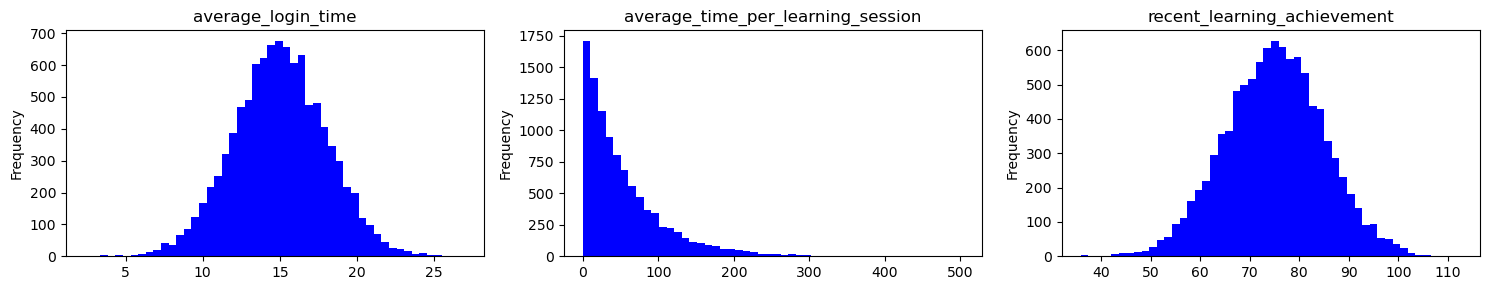

In [8]:
# 수치형 EDA - dtype : float
float_columns = df.select_dtypes(float).columns
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
for idx, column in enumerate(float_columns):
	df[column].plot(kind='hist', bins=50, ax=ax[idx], title=column, color='b')
fig.tight_layout()
plt.show()

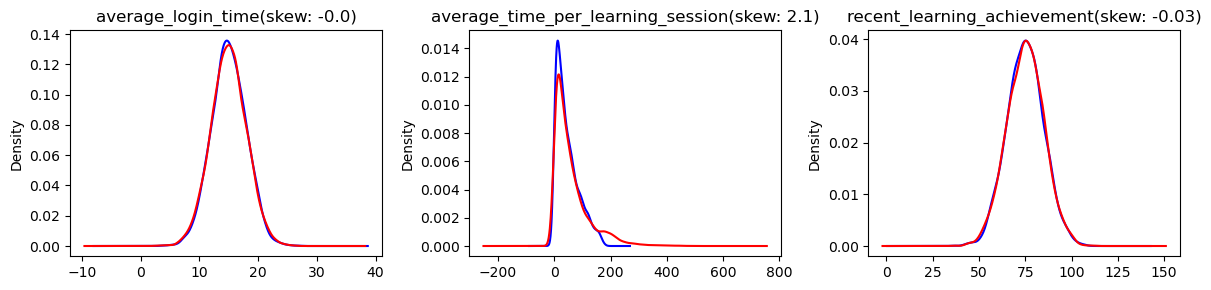

In [25]:
from scipy import stats

float_columns = df.select_dtypes(float).columns
fig, ax = plt.subplots(1,3,figsize=(12 , 3))
for idx, column in enumerate(float_columns):
	df[df['target'] == 0][column].plot(kind='kde', ax=ax[idx], color='b')
	df[df['target'] == 1][column].plot(kind='kde', ax=ax[idx], title=f'{column}(skew: {round(stats.skew(df[column]), 2)})', color='r')

fig.tight_layout()
plt.show()

c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lys45\miniconda3\envs\lee\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

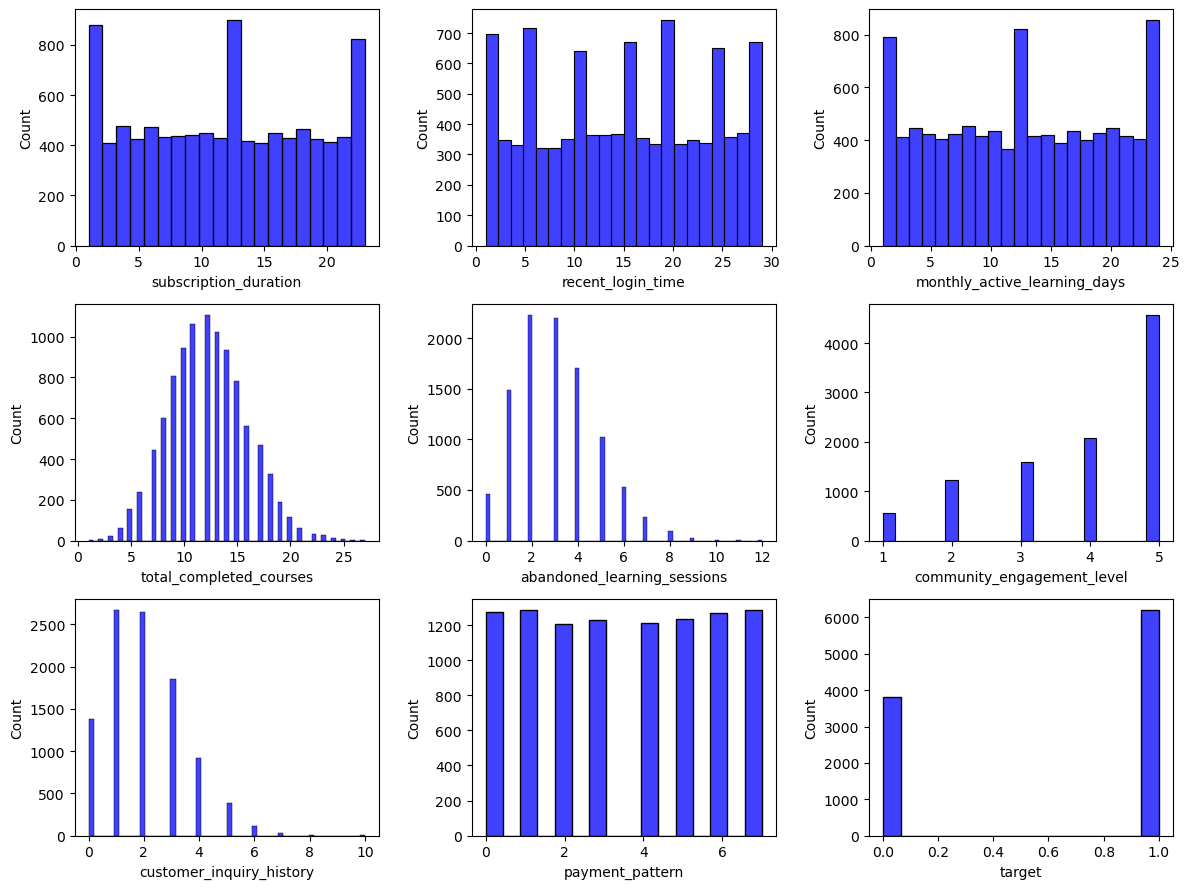

In [26]:
int_columns = df.select_dtypes(int).columns
fig, ax = plt.subplots(3, 3, figsize=(12, 9))
ax = ax.ravel()

for idx, column in enumerate(int_columns):
	sns.histplot(data=df, x=column, ax=ax[idx], color='b')
fig.tight_layout()
plt.show()

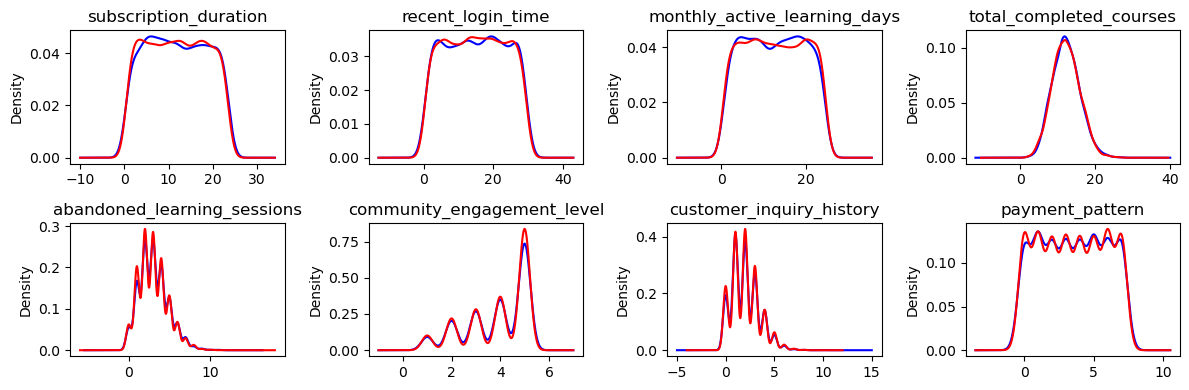

In [38]:
int_columns = df.select_dtypes(int).columns
fig, ax = plt.subplots(2, 4,figsize=(12, 4))
ax = ax.ravel()
for idx, column in enumerate(int_columns[:-1]):
	df[df['target'] == 0][column].plot(kind='kde', ax=ax[idx], title=column, color='b')
	df[df['target'] == 1][column].plot(kind='kde', ax=ax[idx], title=column, color='r')

fig.tight_layout()
plt.show()

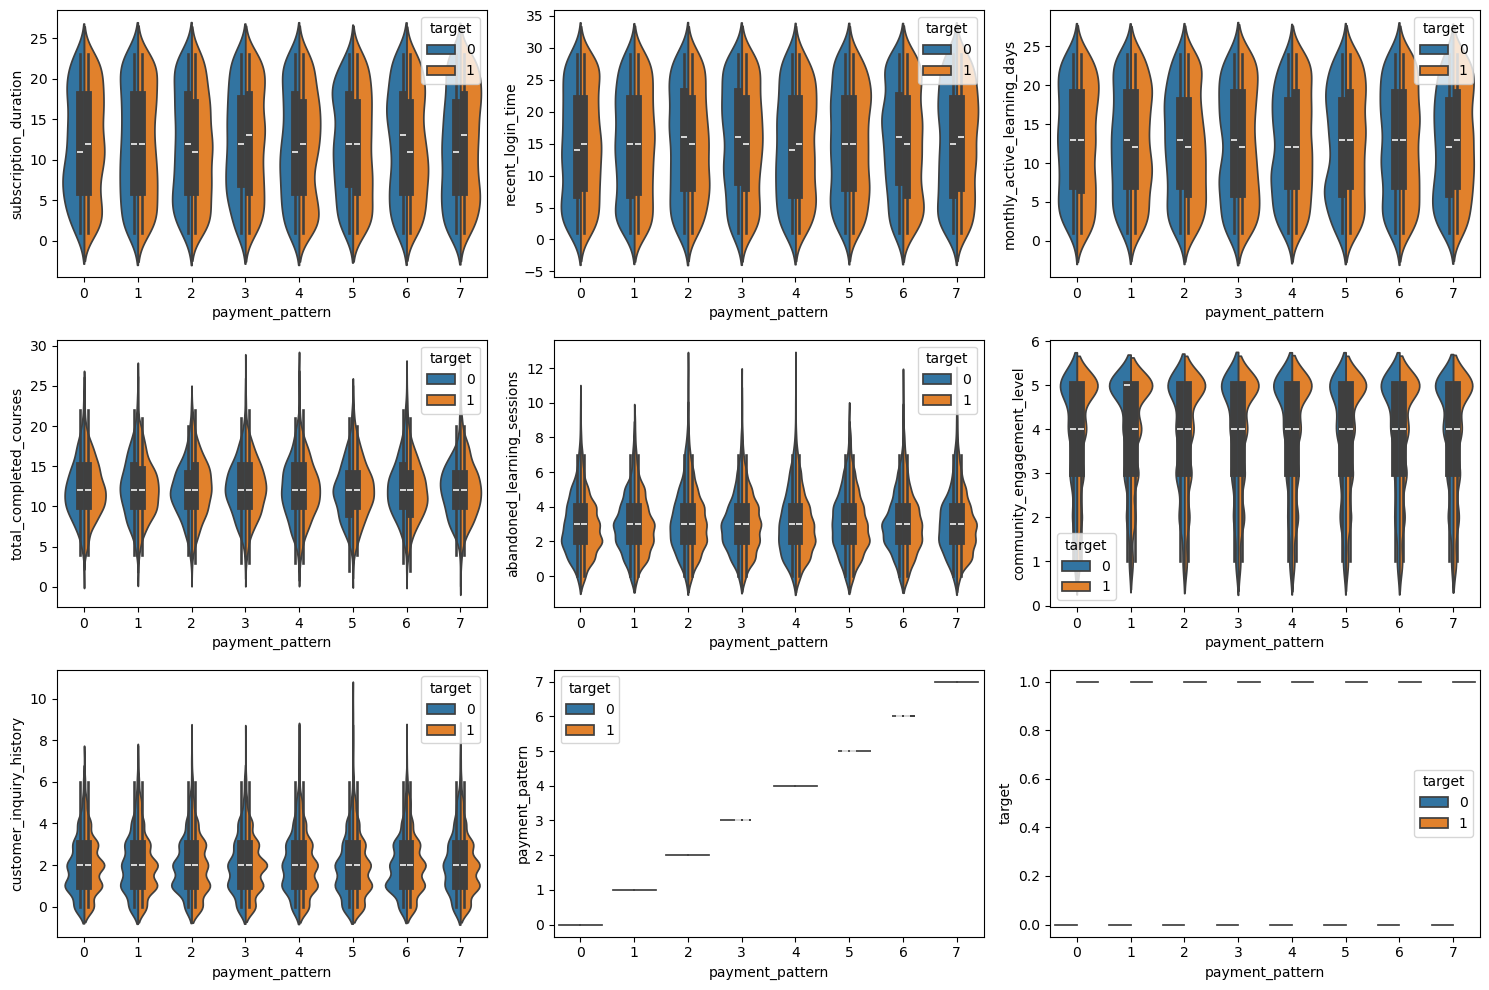

In [160]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))
ax=ax.ravel()
for i, y in enumerate(int_columns):
	sns.violinplot(x="payment_pattern",y=y, hue="target", data=df, split=True, ax=ax[i])
fig.tight_layout()

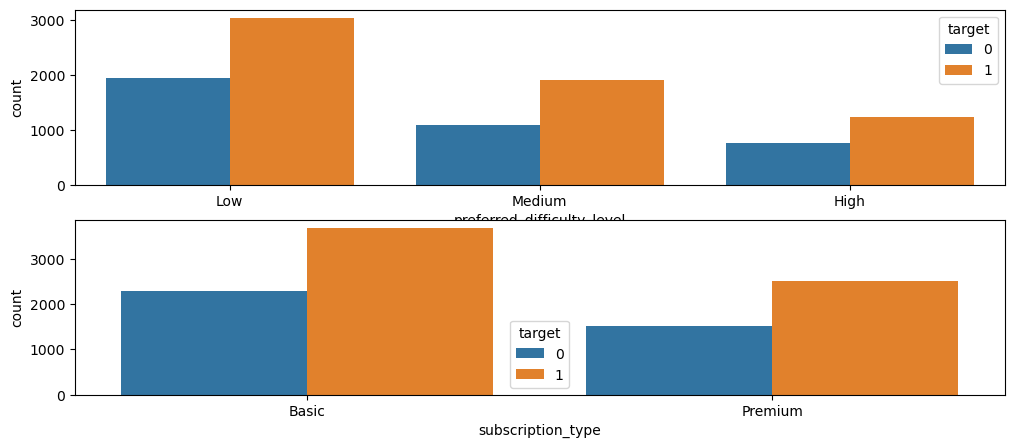

In [9]:
cat_columns = df.select_dtypes('O').columns.drop('user_id')

fig, ax= plt.subplots(2, 1, figsize=(12, 5))

for i, col in enumerate(cat_columns):
	sns.countplot(x=col, data=df, hue='target', ax=ax[i])

In [182]:
count_df = df.groupby(['subscription_type', 'target']).size().reset_index(name='count')
count_df

,subscription_type,target,count
0,Basic,0,2296
1,Basic,1,3683
2,Premium,0,1505
3,Premium,1,2516


In [204]:
contingency_table = count_df.pivot(index='subscription_type', columns='target', values='count')
contingency_table

from scipy import stats
# H0 : 독립적이다(상관이 없다.)
# H1 : 독립적이지 않다(상관이 있다.)
chi2, p, dof, statistics = stats.chi2_contingency(contingency_table)
if p <= 0.05:
	print('Reject H0')
else:
	print('Failed to reject H0. ')

Failed to reject H0.


In [219]:
mapping_payment = {0 : [0, 0, 0]
                    ,1 : [0, 0, 1]
                    ,2 : [0, 1, 0]
                    ,3 : [0, 1, 1]
                    ,4 : [1, 0, 0]
                    ,5 : [1, 0, 1]
                    ,6 : [1, 1, 0]
                    ,7 : [1, 1, 1]
                    }

pattern = df['payment_pattern'].map(mapping_payment)
a = pd.DataFrame()
a[['m-3', 'm-2', 'm-1']] = pattern.tolist()
a['target'] = df['target']
a

,m-3,m-2,m-1,target
0,1,0,1,0
1,1,1,0,1
2,1,1,1,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
9995,0,0,1,1
9996,1,1,1,1
9997,1,1,0,1
9998,0,0,0,1


<Axes: xlabel='payment_pattern', ylabel='count'>

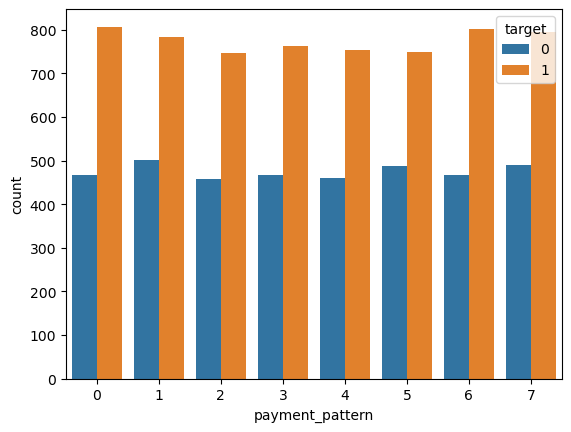

In [222]:
sns.countplot(x='payment_pattern', hue='target', data=df)

<Axes: xlabel='preferred_difficulty_level', ylabel='count'>

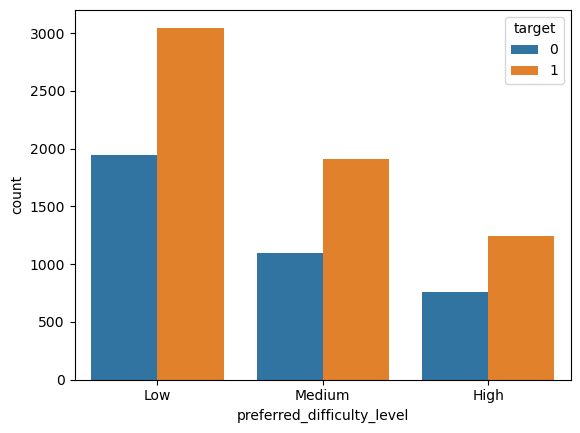

In [224]:
sns.countplot(x='preferred_difficulty_level', hue='target', data=df)

In [234]:
difficulty_counts = df.groupby('preferred_difficulty_level').agg(
	total_count=('target', 'size'),
	ones_count=('target', 'sum')
).reset_index()

difficulty_counts['ratio'] = difficulty_counts['ones_count'] / difficulty_counts['total_count']
difficulty_counts

,preferred_difficulty_level,total_count,ones_count,ratio
0,High,2000,1241,0.620500
1,Low,4992,3047,0.610377
2,Medium,3008,1911,0.635306


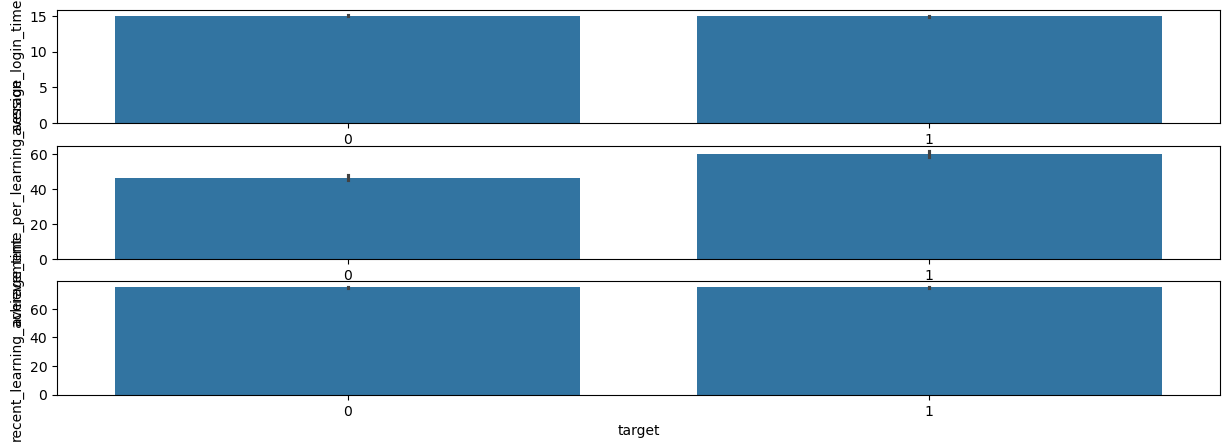

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(15, 5))
for i, col in enumerate(float_columns):
	sns.barplot(x='target', y= col, data=df, ax=ax[i])

In [229]:
df[['preferred_difficulty_level', 'target']]

,preferred_difficulty_level,target
0,Low,0
1,Medium,1
2,Medium,1
3,Low,1
4,Medium,1
...,...,...
9995,Low,1
9996,Medium,1
9997,High,1
9998,Low,1
